<h1>Etude du dataset "datas".</h1>

Ce dataset contient les relevés des principales sources de production de co2, de méthane, d'oxide nitreux et de gaz à effet de serre entre 1909 et 2021, par continent.

Il contient également l'anomalie annuelle de température des continents au cous de la même période.

Ce notebook présente l'approche de ce dataset, sous la forme :    


*   d'une inspection des données dans un dataframe
*   d'une série de représentations graphiques commentées
*   d'une modélisation avec différents algorithmes



# Chargement des librairies.

In [8]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import statsmodels.api as sm

# Chargement du dataset 'datas'.

Appel du fichier 'datas.csv' situé dans le répertoire dédié du dossier partagé.

In [9]:
# procédure à suivre sur Google Collab : 

from google.colab import drive
drive.mount('/gdrive')

import os
path = "/gdrive/.shortcut-targets-by-id/1n7Bl5_QVpPlRHXYKfEZjaJsttl5Af03A/Projet temperatures/datasets/"
os.listdir(path)

df = pd.read_csv(path + 'datas.csv', sep=",")

# procédure classique :

# df = pd.read_csv('datas.csv', sep=",")

Mounted at /gdrive


# Informations du dataframe.

Premier aperçu du dataframe. On constate que la colonne 'iso_code' est vide. On pourra la supprimer au besoin.

In [ ]:
# Affichage des 20 premières lignes du dataframe pour contrôle rapide : 

df.head(20)

Le dataframe, à l'exception de la colonne 'iso_code', ne contient aucune valeur manquante. L'ensemble des données sont du type float, donc explicatives numériques. Seule la colonne 'country' est de type catégorielle.

In [ ]:
# Affichage des informations principales du dataframe pour vérifier
# la nature des différentes variables et la présence éventuelle de nan.

df.info()

In [ ]:
# Contrôle du nombre de valeurs nulles par colonnes.

df.isna().sum()

La fonction describe permet d'inspecter les données numériques. On remarque rapidement un écart important entre les troisièmes quartiles et les valeurs maximales, notamment pour la colonne 'co2' ou 'methane'.
De plus, les moyennes des valeurs de ces colonnes sont relativement faibles et se rapprochent de la médiane, ce qui sous-entend que certaines valeurs, peu nombreuses, sont très fortes.

In [ ]:
df.describe()

In [10]:
# La colonne 'iso_code' est inutile, on la supprime du dataframe :

df = df.drop('iso_code', axis=1)

# Corrélations et tests statistiques.

Le but de cette section est d'établir les liens possibles de corrélation entre les différentes variables du dataframe. Certaines variables sont peut-être plus liées à la variable cible et l'évolution de leurs valeurs à probablement un impact sur l'évolution des valeurs de la variable cible.

Nous allons afficher la table des corrélations entre les différentes valeurs numériques.


La heatmap issue de cette table nous permets d'identifier les corrélations les plus fortes en relation avec notre valeur cible (à savoir la colonne 'temp_anomaly').

Il semble que les variables 'year', 'gas_co2' et 'total_ghg' soient parmi les plus corrélées avec la cible.

In [ ]:
# Affichage de la table de corrélation pour toutes les variables numériques du dataframe :

df.corr()

La lecture de la table de corrélation n'est pas toujours aisée, nous allons l'afficher sous la forme d'une heatmap, où le jeu de couleurs nous permettra très rapidement de localiser les corrélations les plus fortes.

In [ ]:
# Création d'une variable cor pour stocker les corrélations :
cor = df.corr()

# Création de la heatmap et affichage :

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cor, annot=True, ax=ax, cmap='inferno');


En nous focalisant sur la ligne concernant la variable cible 'temp_anomaly', nous constatons les plus fortes corrélations avec les variables suivantes :


*   'year'
*   'gas_co2'
*   'methane'
*   'nitrous_oxide'
*   'total_ghg'



L'affichage de la répartition relative entre les différentes variables peut permettre d'avancer les hypothèses suivantes :    


*   peu de répartitions de variables se rapprochent de la loi naturelle, traduisant sans doute des phénomènes artificiels non liés au hasard.
*   la présence fréquente des données relatives à l'Asie (points oranges) qui, sur la grande majorité des graphiques, sont placés dans les zones de fortes valeurs.





In [ ]:
# Création des scatterplots sur les variables numériques du dataframe et affichage :

g = sns.PairGrid(data = df.iloc[:,[0,5,6,7,8,9,10,11,12,13,14]], hue = 'country')
g.map(plt.scatter, alpha = 0.6)
g.add_legend();

**Tests de Pearson sur les principales variables.**


Nous allons appliquer le test de Pearson afin de comparer leur corrélation avec la valeur cible 'temp_anomaly'.

**1 - Test entre 'total_ghg' et 'temp_anomaly' :**

In [ ]:
# Sélection des deux variables continues à étudier :

x = df['total_ghg']
y = df['temp_anomaly']

# Pour rappel, la fonction pearsonr a été importée lors de l'appel des différentes librairies.

pearsonr(x, y)

# Affichage de la p-value et du coefficient de corrélation :

print("p-value: ", pearsonr(x = df["total_ghg"], y = df["temp_anomaly"])[1])
print("coefficient: ", pearsonr(x = df["total_ghg"], y = df["temp_anomaly"])[0])

H0 : Le total des émissions de gaz à effet de serre n'a pas d'incidence sur les anomalies de températures


H1 : Le total des émissions de gaz à effet de serre a une incidence sur les anomalies de températures


p-value =  1.4115724450324765e-73 par conséquent on peut conclure à une corrélation entre le total des émissions de gaz à effet de serre et les anomalies de températures.
Le coefficient nous permet de voir l'intensité de la corrélation.


**2 - Test entre 'co2' et 'temp_anomaly' :**


In [ ]:
#from scipy.stats import pearsonr

pearsonr(x = df["temp_anomaly"], y = df["co2"]) 

# Affichage de la p-value et du coefficient de corrélation :

print("p-value: ", pearsonr(x = df["temp_anomaly"], y = df["co2"])[1])
print("coefficient: ", pearsonr(x = df["temp_anomaly"], y = df["co2"])[0])

**3 - Test entre 'year' et 'temp_anomaly' :**

In [ ]:
x = df['year']
y = df['temp_anomaly']

pearsonr(x, y)

# Affichage de la p-value et du coefficient de corrélation :

print("p-value: ", pearsonr(x = df["year"], y = df["temp_anomaly"])[1])
print("coefficient: ", pearsonr(x = df["year"], y = df["temp_anomaly"])[0])

**4 - Test entre 'gas_co2' et 'temp_anomaly' :**

In [ ]:
x = df['gas_co2']
y = df['temp_anomaly']

pearsonr(x, y)

# Affichage de la p-value et du coefficient de corrélation :

print("p-value: ", pearsonr(x = df["gas_co2"], y = df["temp_anomaly"])[1])
print("coefficient: ", pearsonr(x = df["gas_co2"], y = df["temp_anomaly"])[0])

Distribution des différentes variables selon les pays.
Il est intéressant de noter que, pour la variables des anomalies de températures, la distribution est différente selon les pays, ce qui sous-entend que les anomalies de températures ne sont pas homogènes sur le globe.

In [ ]:
import scipy.stats as stats

# Catégories uniques de la colonne "country"
categories = df['country'].unique()

# Itérer sur les colonnes
for col in df.columns[1:]:
    # Créer la figure et les sous-graphiques
    fig, axs = plt.subplots(1, len(categories), figsize=(18, 5))

    # Itérer sur les catégories et afficher les graphiques
    for i, cat in enumerate(categories):
        ax = axs[i]
        subset_data = df[df['country'] == cat]
        stats.probplot(subset_data[col], dist="norm", plot=ax)
        ax.set_xlabel('Quantiles théoriques')
        ax.set_ylabel('Quantiles observés')
        ax.set_title('qq-plot - ' + col + ' (' + cat + ')')
        ax.grid(True, linestyle='--')

    plt.tight_layout()
    plt.show()

# Graphiques

La visualisation des données à l'aide de graphiques nous permettra de constater plus facilement les éventuelles relations entre la variables et d'avance des hypothèses sur les facteurs qui agissent sur la variable cible des anomalies de températures.

Ces graphiques permettront également d'observer les principales évolutions des différentes variables dans le temps, et la part plus ou moins importantes de continent dans ce phénomènes.

In [ ]:
sns.relplot(x='year', y='total_ghg', hue='country', size='population', data=df[df['year']> 1990])
plt.title('Total ghg de 1909 à 2022 en fonction de la population par continent');

On constate la part importante de l'Asie dans l'émission des gaz à effet de serre, avec un décrochage à la hausse depuis 1990. L'Europe et l'Amérique du Nord ont tendance à stagner, voire baisser.
Les continents émergents, comme l'Afrique et l'Amérique du Sud sont en légère progression.

In [ ]:
plt.figure(figsize=(8,8))

plt.bar(df['country'], df['cement_co2'], label ='cement co2')
plt.bar(df['country'], df['coal_co2'],  bottom =df['cement_co2'], label ='coal_co2')
plt.bar(df['country'], df['flaring_co2'],  bottom =df['cement_co2'], label ='flaring_co2')
plt.bar(df['country'], df['gas_co2'],  bottom =df['cement_co2'], label ='gas_co2')
plt.bar(df['country'], df['methane'],  bottom =df['cement_co2'], label ='methane')
plt.bar(df['country'], df['nitrous_oxide'],  bottom =df['cement_co2'], label ='nitrous_oxide')
plt.bar(df['country'], df['oil_co2'],  bottom =df['cement_co2'], label ='oil_co2')

plt.title('Types gaz et hydrocarbures émettant Co2 par continent de 1909 à 2021')
plt.legend();

Nous constatons que le charbon et le pétrole sont les hydrocarbures rejettant le plus de Co2 de manière globale.

In [ ]:
plt.figure(figsize=(8,8))
plt.bar('country', 'cement_co2', data=df[df['year']==2021])
plt.bar('country', 'coal_co2', data=df[df['year']==2021])
plt.bar('country', 'flaring_co2', data=df[df['year']==2021])
plt.bar('country', 'gas_co2', data=df[df['year']==2021])
plt.bar('country', 'methane', data=df[df['year']==2021])
plt.bar('country', 'nitrous_oxide', data=df[df['year']==2021])
plt.bar('country', 'oil_co2', data=df[df['year']==2021])
plt.title('Type émissions Co2 par continent en 2021')
plt.legend();

En prenant en compte seulement l'années 2021, l'observation précédente reste inchangée. En effet, le charbon reste l'hydrocarbure émettant le plus de Co2 à présent notamment en Afrique et surtout en Asie.

In [ ]:
sns.relplot(x='co2_per_capita', y='population', hue='country', kind='line', data=df)
plt.ylim([0,4000000000])
plt.title('Niveau de Co2 par habitant en fonction de la population par continent');

Ce graphique permet d'observer que le taux de Co2 par habitant n'augmente pas proportionnellement à la population. 

En effet, le taux de CO2 par habitant le plus elevé correspond à l'Amérique du Nord or, la population la plus élevée est détenue par le continent asiatique.

In [ ]:
sns.relplot(x='year', y='co2', hue='country', col= 'country', col_wrap = 3, kind='line', height=3, data=df)
plt.title('Niveau de Co2 par année et par continent');

Les graphiques ci-dessus se rapprochent de celui sur les émissions de gaz à effet de serre : l'Asie connait une explosion de ce niveau de Co2 depuis 1990 environ, alors que l'Europe et l'Amérique connaissent une baisse progressive après un pic ayant eut lieu vers 2000.

In [ ]:
sns.relplot(x='year', y='temp_anomaly', hue='country', col= 'country', col_wrap = 3, kind='line', height=3, data=df)
plt.title('Anomalies de température année et par continent');

Les graphiques ci-dessus représentent l'évolution des anomalies de températures annuelles, par continent.
On constate une progression à la hausse généralisée, avec une accélaration à partir de 1975 environ.
L'Europe, l'Asie et l'Amérique du Nord connaissent une accélaration plus sensible que pour les autres continents.

In [ ]:
print(df.groupby('country').agg({'temp_anomaly':'mean'}))

bar = pd.DataFrame({'continent': ['Africa','Asia', 'Europe', 'North America', 'Oceania', 'South America'], 'temp_anomaly by continent': [0.182143, .254732, .237946, .202768, .153125, .181964]})
bar.plot.bar(x = 'continent', y='temp_anomaly by continent',stacked=True, figsize=(8,8))
plt.ylabel('temperature');


Le graphique ci-dessus compare la moyenne des anomalies par continent (moyenne établie sur l'ensemble de la période 1909-2021).

In [ ]:
print(df.groupby('country').agg({'co2':'sum'}))

pie = pd.DataFrame({'continent': ['Africa','Asia', 'Europe', 'North America', 'Oceania', 'South America'], 'Co2 by continent':[49011.501, 556511.191, 491897.458, 464213.148, 21083.183, 44145.154]})
pie.groupby(['continent']).sum().plot(
    kind='pie', y='Co2 by continent',autopct='%1.0f%%', figsize=(10,10), explode = [0, 0.1, 0, 0, 0, 0], colors=['#00BFFF','#0B3861','#08088A','#3A01DF','#A9BCF5','#9A2EFE'])
plt.title('Taux Co2 par continent');

Le piechart ci-dessus répresente la part de production de Co2 par continent sur la période étudiée : l'Asie, l'Europe et l'Amérique du Nord répresentent l'écrasante majorité de cette production (93%), les autres continents étant à la marge.
On constate que l'Asie supplante les deux autres gros continents producteurs.

In [ ]:
df.groupby('country').agg({'cement_co2':'sum', 'coal_co2':'sum','flaring_co2':'sum','gas_co2':'sum', 'methane':'sum', 'nitrous_oxide':'sum', 'oil_co2':'sum'})

pie2 = pd.DataFrame({'continent':['Africa','Asia', 'Europe', 'North America', 'Oceania', 'South America'], 'total hydrocarbon by continent': [1945.338+20466.809+2918.013+6304.813+31344.67+14925.73+17376.517,
                                                                                                                                              27959.30+2294182.837+6423.849+60839.257+104486.62+34524.40+161425.204,
                                                                                                                                              9148.309+241092.720+2800.756+83982.285+45109.33+16795.84+152689.696,
                                                                                                                                              4150.340+168027.846+3711.371+92010.659+29695.64+11545.53+194809.197,
                                                                                                                                              230.975+10757.753+331.286+2498.384+6184.50+3400.58+7130.552,
                                                                                                                                              1631.178+4760.709+2269.005+8118.475+34275.42+10281.36+27196.159]})
pie2.groupby(['continent']).sum().plot(
    kind='pie', y='total hydrocarbon by continent',autopct='%1.0f%%', figsize=(10,10), explode = [0, 0.1, 0, 0, 0, 0], colors=['#FE9A2E','#B40404','#FF0000','#FF4000','#F3F781','#F7D358'])
plt.title('Total hydrocarbures par continent');                                                                                                                                    

Le piechart ci-dessus représente la part d'émission de Co2 liée à la production d'énérgie fossile (extraction pétrolière, gazière, mines de charbon...).
L'Asie représente la part principale (68%) de cette émission.

# Modélisations

Les modélisations vont nous permettre, grâce à l'usage de certains modèles, de trouver le meilleur algorithme qui pourra prédire l'évolution de la variable cible dans le futur.

Nous avons fait le choix de tester différents modèles avec un dataframe légèrement différent à chaque fois :    


*   en utilisant la dataframe dans sa totalité
*   en isolant la colonne 'year'
*   en isolant la colonne 'country' représentant les différents continents.




**1 - Modélisation avec le dataframe complet**

Pour rappel, la colonne 'iso_code' a été supprimée en amont.

In [11]:
# Isolation des variables explications de la variable cible 'temp_anomaly' :

feats = df.drop('temp_anomaly', axis = 1)
target = df['temp_anomaly']

# Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.25, random_state = 42)

# Encodage de la variable catégorielle 'country' :

cat_train = pd.get_dummies(X_train['country'], columns = 'country') 
cat_test = pd.get_dummies(X_test['country'], columns = 'country') 

# Concaténation des nouvelles colonnes issues de l'encodage avec le reste du jeu d'entraînement
# et du jeu de test. On supprimera ensuite la colonne 'country' qui est superflue :

X_train2 = pd.concat([X_train,cat_train], axis = 1)
X_test2 = pd.concat([X_test,cat_test], axis = 1)

X_train2 = X_train2.drop('country', axis = 1)
X_test2 = X_test2.drop('country', axis = 1)

# Normalisation des données :

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

num = ['year', 'population', 'gdp', 'cement_co2', 'co2', 'co2_per_capita', 'coal_co2', 'flaring_co2', 'gas_co2', 'methane', 'nitrous_oxide', 'oil_co2', 'total_ghg']

X_train2.loc[:,num] = sc.fit_transform(X_train2[num])
X_test2.loc[:,num] = sc.transform(X_test2[num])

# Les jeux d'entraînement et de test sont prêts pour la modélisation.

**Modèle LinearRegression**

In [12]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

# Entraînement du modèle :

regressor.fit(X_train2, y_train)

# Affichage du score :

print('Coefficient de détermination du modèle sur train:', regressor.score(X_train2, y_train))
print('Coefficient de détermination du modèle sur test:', regressor.score(X_test2, y_test))

Coefficient de détermination du modèle sur train: 0.6907730750775487
Coefficient de détermination du modèle sur test: 0.7067733871317345


In [13]:
# Affichage de l'intercept de la régression linéaire :

coeffs = list(regressor.coef_)
coeffs.insert(0, regressor.intercept_)

feats2 = list(X_train2.columns)
feats2.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index=feats2)

,valeur estimée
intercept,0.188249
year,0.412546
population,0.046386
gdp,0.101070
cement_co2,-0.146921
co2,9.277712
co2_per_capita,-0.091265
coal_co2,-4.941233
flaring_co2,-0.136740
gas_co2,-1.737455


Le modèle de régression linéaire obtient un bon score et, surtout, la table de l'intercept met en valeurs l'impact des différentes variables sur la variable cible.

On pourra déduire que :    


*   la variable 'year' a la plus grande influence sur la cible, ce qui soulève un problème possible sur le jeu de données : pourquoi le temps serait-il le facteur le plus impactant ? Cette hypothèse semble trop simpliste.
*   les gaz à effet de serre (ghg) et l'oxide nitreux ont une grande influence sur la variable cible.

L'affichage de la droite de régression linéaire montre la répartition des prédictions du modèle :    

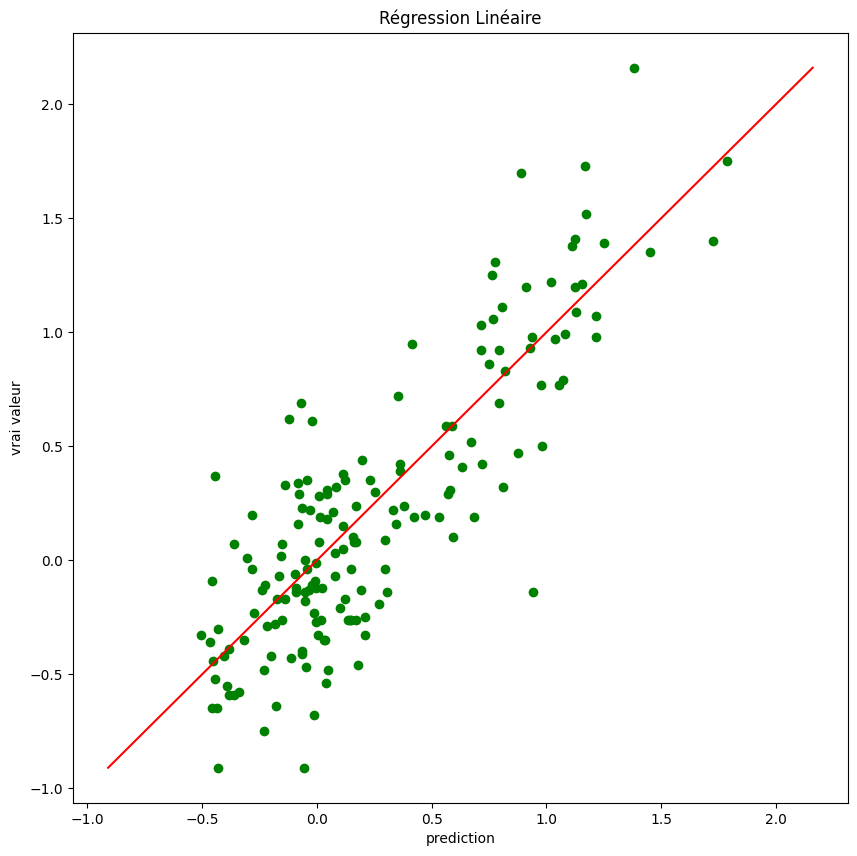

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
pred_test = regressor.predict(X_test2)
plt.scatter(pred_test, y_test, c='green')

plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')
plt.xlabel("prediction")
plt.ylabel("vrai valeur")
plt.title('Régression Linéaire')

plt.show()

**Modèle DecisionTreeRegressor**

Coefficient de détermination du modèle sur train: 1.0
Coefficient de détermination du modèle sur test: 0.6477530667455965


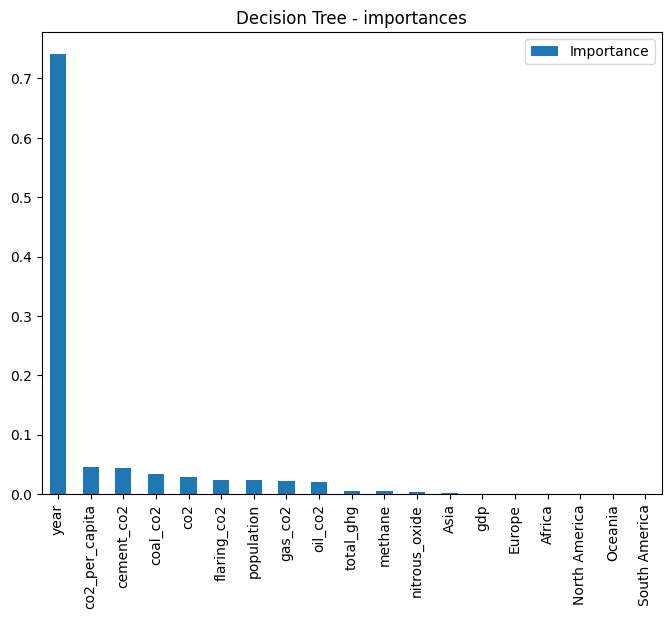

In [15]:
from sklearn.tree import DecisionTreeRegressor 
  
regressor = DecisionTreeRegressor(random_state=42) 
regressor.fit(X_train2, y_train)

# Affichage du score :

print('Coefficient de détermination du modèle sur train:', regressor.score(X_train2, y_train))
print('Coefficient de détermination du modèle sur test:', regressor.score(X_test2, y_test))

# Affichage de l'importance des variables :

import matplotlib.pyplot as plt

feat_importances = pd.DataFrame(regressor.feature_importances_, index=X_train2.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.title('Decision Tree - importances')
plt.show()

**Modèle RandomForestRegressor**

Coefficient de détermination du modèle sur train: 0.9537116811052384
Coefficient de détermination du modèle sur test: 0.7458257019873131


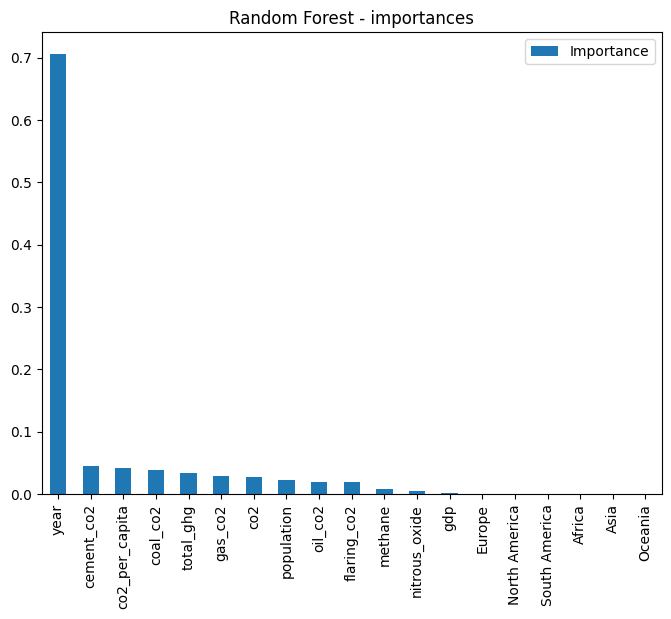

In [16]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 42)

rfr.fit(X_train2, y_train)

print('Coefficient de détermination du modèle sur train:',rfr.score(X_train2, y_train))
print('Coefficient de détermination du modèle sur test:',rfr.score(X_test2, y_test))

feat_importances = pd.DataFrame(rfr.feature_importances_, index=X_train2.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.title('Random Forest - importances')
plt.show()

Les deux modèles étudiés ont de meilleurs scores que la régression linéaire, avec un avantage pour le 'Random Forest'. 

En revanche, l'affiche de l'importance des variables montre l'écrasante influence de la variable 'year' sur la cible, ce qui renforce l'idée que la variable temporelle a une importance éxagerée voire injustifiée dans la modélisation.

**2 - Modélisation sans la colonne 'year'**

In [ ]:
# création d'une copie du dataframe initial et suppression de la colonne 'year' :

df2 = df.drop('year', axis = 1)
feats = df2.drop('temp_anomaly', axis = 1)
target = df2['temp_anomaly']

# Split, encodage et normalisation des données à l'identique :

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.25, random_state = 42)

cat_train = pd.get_dummies(X_train['country'], columns = 'country') 
cat_test = pd.get_dummies(X_test['country'], columns = 'country') 

X_train2 = pd.concat([X_train,cat_train], axis = 1)
X_test2 = pd.concat([X_test,cat_test], axis = 1)

X_train2 = X_train2.drop('country', axis = 1)
X_test2 = X_test2.drop('country', axis = 1)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

num = ['population', 'gdp', 'cement_co2', 'co2', 'co2_per_capita', 'coal_co2', 'flaring_co2', 'gas_co2', 'methane', 'nitrous_oxide', 'oil_co2', 'total_ghg']

X_train2.loc[:,num] = sc.fit_transform(X_train2[num])
X_test2.loc[:,num] = sc.transform(X_test2[num])

**Modèle LinearRegression**

In [17]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

# Entraînement du modèle :

regressor.fit(X_train2, y_train)

# Affichage du score :

print('Coefficient de détermination du modèle sur train:', regressor.score(X_train2, y_train))
print('Coefficient de détermination du modèle sur test:', regressor.score(X_test2, y_test))

# Affichage de l'intercept :

coeffs = list(regressor.coef_)
coeffs.insert(0, regressor.intercept_)

feats2 = list(X_train2.columns)
feats2.insert(0, 'intercept')

pd.DataFrame({'valeur estimée': coeffs}, index=feats2)

Coefficient de détermination du modèle sur train: 0.6907730750775487
Coefficient de détermination du modèle sur test: 0.7067733871317345


,valeur estimée
intercept,0.188249
year,0.412546
population,0.046386
gdp,0.101070
cement_co2,-0.146921
co2,9.277712
co2_per_capita,-0.091265
coal_co2,-4.941233
flaring_co2,-0.136740
gas_co2,-1.737455


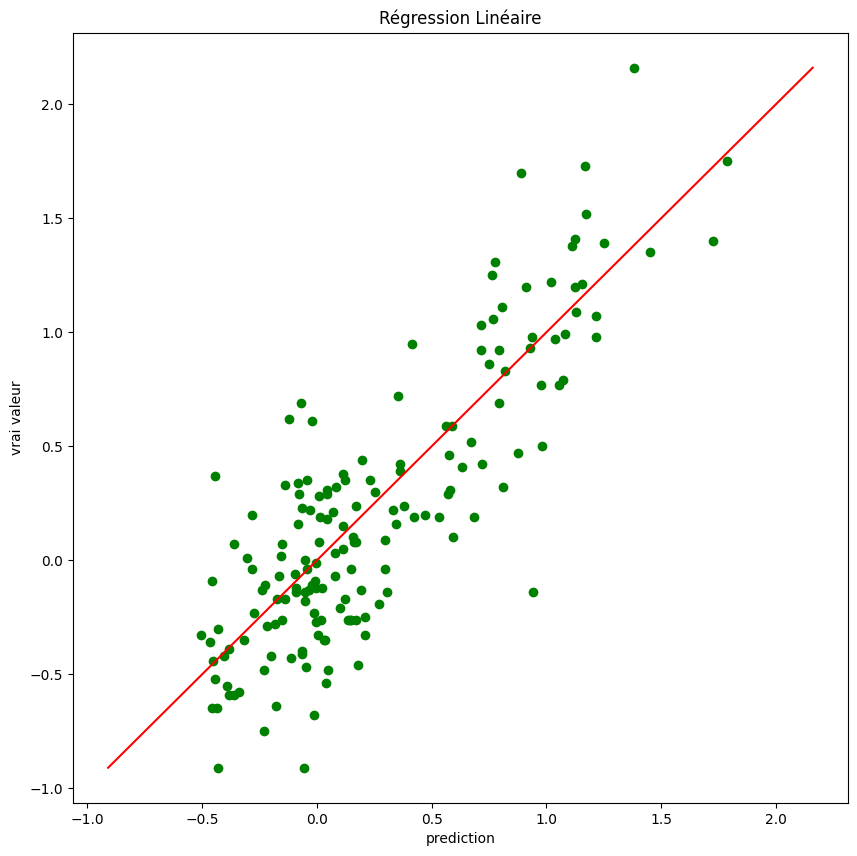

In [19]:
# Affichage de la droite de régression linéaire :

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
pred_test = regressor.predict(X_test2)
plt.scatter(pred_test, y_test, c='green')

plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')
plt.xlabel("prediction")
plt.ylabel("vrai valeur")
plt.title('Régression Linéaire')

plt.show()

On remarque que cette régression linéaire a un score moins bon que la précédente. De plus, à l'observation du graphique ci-dessus, il semble que la droite "colle" moins bien à l'ensemble des points.

En revanche, la table de l'intercept montre maintenant que les variables 'coal_co2', 'gas_co2' et 'oil_co2' sont les plus influentes sur la variable cible.

**Modèle RandomForestRegressor**

0.9537116811052384
0.7458257019873131


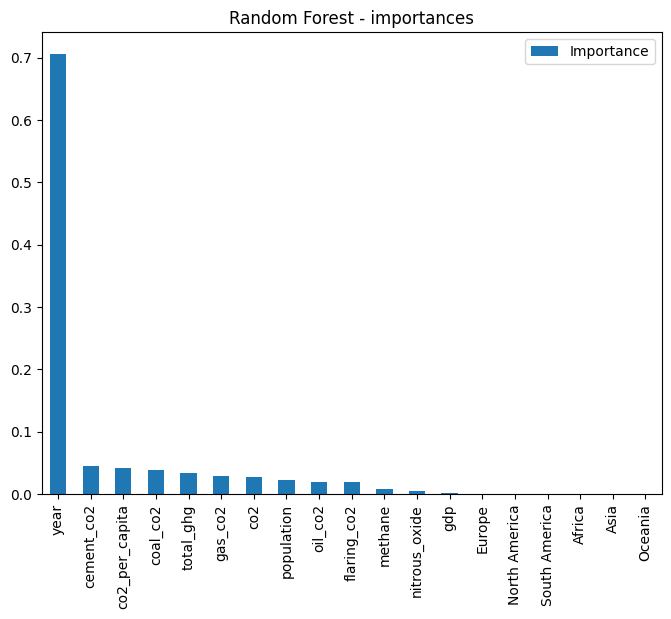

In [18]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 42)

rfr.fit(X_train2, y_train)

print(rfr.score(X_train2, y_train))
print(rfr.score(X_test2, y_test))

feat_importances = pd.DataFrame(rfr.feature_importances_, index=X_train2.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))
plt.title('Random Forest - importances')
plt.show()

Le modèle Random Forest, sur ce nouveau dataframe, obtient également un bon score. Cependant, c'est la variable 'total_ghg' (le total des émissions de gaz à effet de serre) qui est la plus importante avec le méthane.

Les variables liées au co2 passent ensuite. On remarquera l'influence nulle des différents continents.

**3 - Modélisation sans la colonne 'country'.**

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop(['temp_anomaly', 'country'], axis =1)
y = df['temp_anomaly']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**Modèle LinearRegression**

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

print("Score ensemble train", lr.score(X_train,y_train))
print("Score ensemble test", lr.score(X_test, y_test))

In [ ]:
coeffs = list(lr.coef_)
coeffs.insert(0, lr.intercept_)

X2= list(X.columns)
X2.insert(0, 'intercept')

pd.DataFrame({'valeur estimée':coeffs}, index=X2)

In [ ]:
print("Coefficient de détermination sur ensemble train", lr.score(X_train,y_train))
print("Coefficient de détermination sur ensemble test", lr.score(X_test, y_test))

#Plus le coefficient de détermination est proche de 1, plus les données collent à la droite de régression.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9,9))
pred_test = lr.predict(X_test)
plt.scatter(pred_test, y_test, color='magenta')

plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color='red')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.title('Régression linéaire pour la prédiction des anomalies de températures')
plt.show();

In [ ]:
error = y_test - pred_test
print(error)

**Modèle DecisionTreeRegressor**

In [21]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state =42)
dtr.fit(X_train, y_train)


print("Score ensemble train", dtr.score(X_train, y_train))
print("Score ensemble test", dtr.score(X_test, y_test))

Score ensemble train 1.0
Score ensemble test 0.5715743416280948


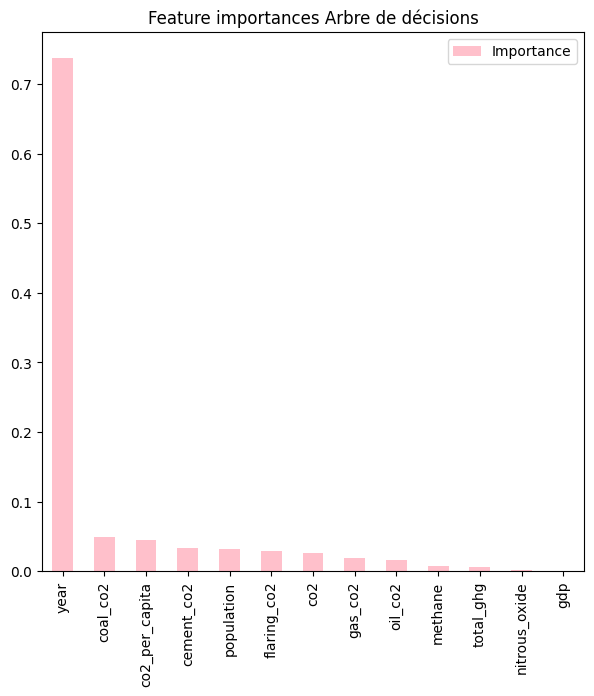

In [22]:
import matplotlib.pyplot as plt

feature_importances = pd.DataFrame(dtr.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.plot(kind='bar', figsize=(7,7), color='pink')
plt.title('Feature importances Arbre de décisions')
plt.show();

Nous allons afficher l'arbre de décision :

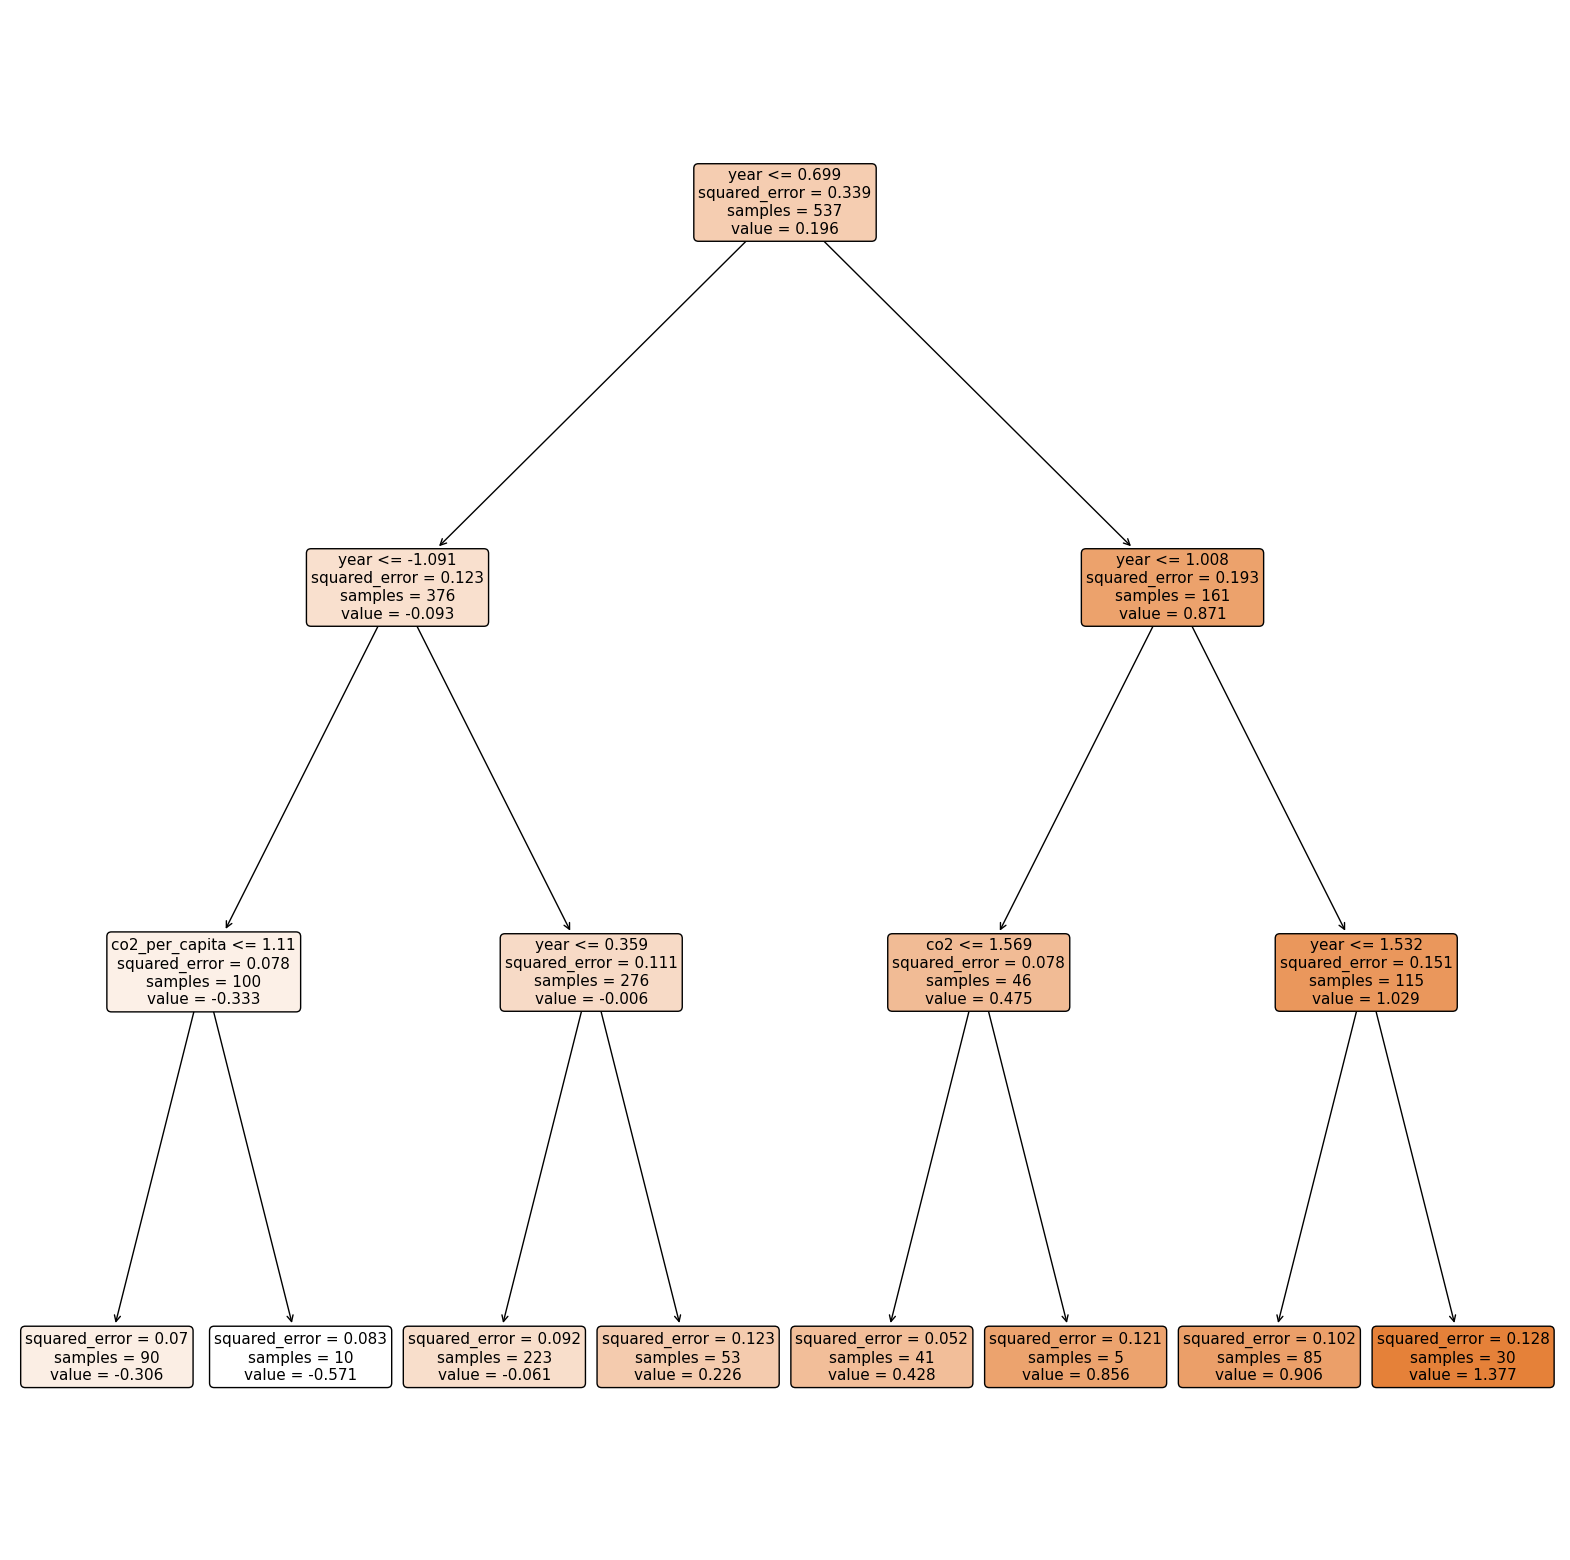

In [23]:
from sklearn.tree import plot_tree

regressor = DecisionTreeRegressor(random_state=42, max_depth = 3) 
  
regressor.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(20, 20))  

plot_tree(regressor, 
          feature_names = ['year', 'population', 'gdp', 'cement_co2', 'co2', 'co2_per_capita', 'coal_co2', 'flaring_co2', 'gas_co2', 'methane', 'nitrous_oxide', 'oil_co2', 'total_ghg', 'temp_anomaly'], 
          filled = True, 
          rounded = True)

plt.show();

L'arbre de décision met bien en relief la surimportance de la variable 'year' : en effet, elle apparaît jusqu'au troisième noeud de l'arbre ! 

Ce qui montre bien que cette variable pose problème et fausse sans doute les résultats.

In [ ]:
# Affichage du score :

print('Coefficient de détermination du modèle sur train:', regressor.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', regressor.score(X_test, y_test))


In [ ]:
#from sklearn.metrics import classification_report
#y_pred = regressor.predict(X_test)
#display(pd.crosstab(y_test,y_pred, rownames=['Realité'], colnames=['Prédiction']))
#print(classification_report(y_test, y_pred))

**Modèle RandomForestRegressor**

In [24]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

print("Score ensemble train", rfr.score(X_train, y_train))
print("Score ensemble test", rfr.score(X_test, y_test))

Score ensemble train 0.956191893697089
Score ensemble test 0.7204673038466303


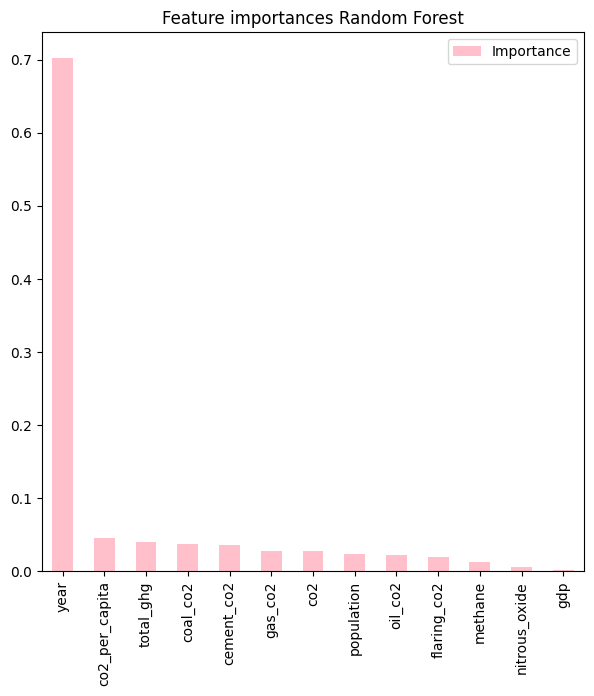

In [25]:
feature_importances = pd.DataFrame(rfr.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.plot(kind='bar', figsize=(7,7), color='pink')
plt.title('Feature importances Random Forest')
plt.show();

**Modèle Lasso**

In [26]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

ls = make_pipeline(StandardScaler(), Lasso(alpha=.015))

ls.fit(X_train, y_train)

print("Score ensemble train :", ls.score(X_train, y_train))
print("Score ensemble test :", ls.score(X_test, y_test))

Score ensemble train : 0.6695170836184214
Score ensemble test : 0.669806081309698


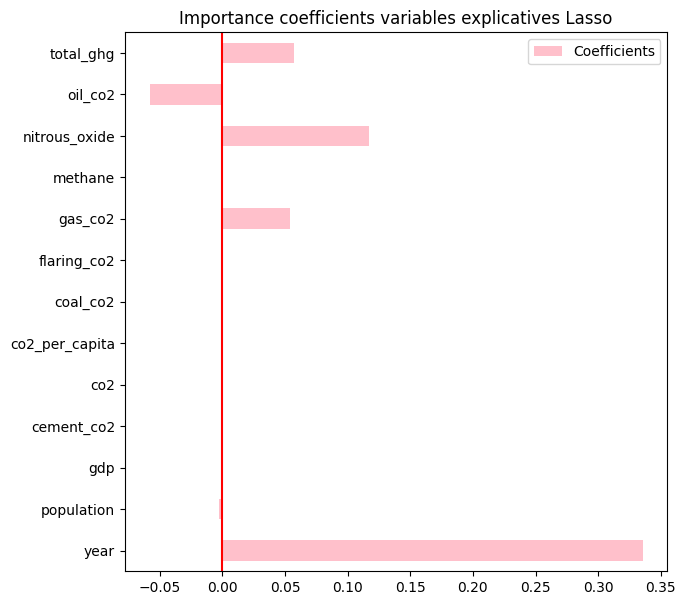

In [27]:
coefs = pd.DataFrame(ls[1].coef_, columns=['Coefficients'], index= X.columns)

coefs.plot(kind='barh', figsize=(7, 7), color = 'pink')
plt.title('Importance coefficients variables explicatives Lasso')
plt.axvline(x=0, color='red')
plt.show();



**Modèle GradientBoostingRegressor**

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)

print("Score ensemble train :",reg.score(X_train, y_train))
print("Score ensemble test :", reg.score(X_test, y_test))

Score ensemble train : 0.8791403341726561
Score ensemble test : 0.746568463488195


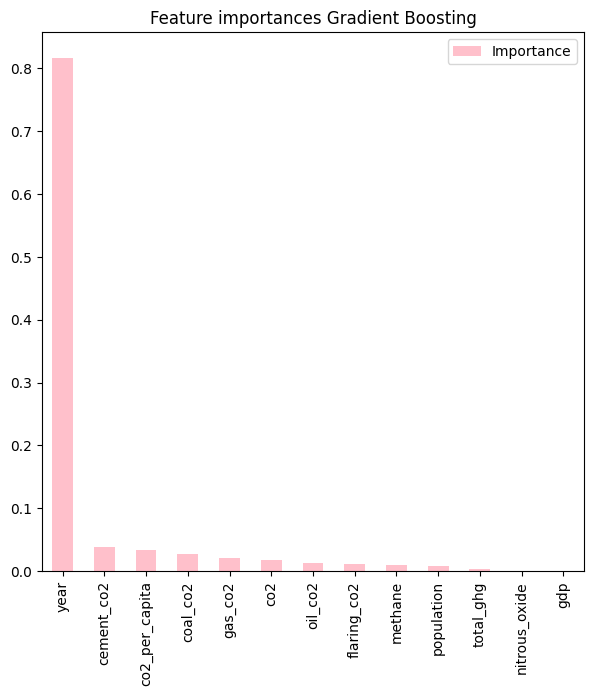

In [29]:
feature_importances = pd.DataFrame(reg.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.plot(kind='bar', figsize=(7,7), color='pink')
plt.title('Feature importances Gradient Boosting')
plt.show();

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor

#Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(X_train, y_train)

y_pred_test_dtr = dtr.predict(X_test)
y_pred_train_dtr = dtr.predict(X_train)

mae_dtr_train = mean_absolute_error(y_train, y_pred_train_dtr)
mse_dtr_train = mean_squared_error(y_train, y_pred_train_dtr)
rmse_dtr_train = mean_squared_error(y_train, y_pred_train_dtr, squared=False)


mae_dtr_test = mean_absolute_error(y_test, y_pred_test_dtr)
mse_dtr_test = mean_squared_error(y_test, y_pred_test_dtr)
rmse_dtr_test = mean_squared_error(y_test, y_pred_test_dtr, squared=False)


#Random Forest Regressor

rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

y_pred_train_rfr = rfr.predict(X_train)
y_pred_test_rfr =rfr.predict(X_test)


mae_rfr_train = mean_absolute_error(y_train, y_pred_train_rfr)
mse_rfr_train = mean_squared_error(y_train, y_pred_train_rfr)
rmse_rfr_train = mean_squared_error(y_train, y_pred_train_rfr, squared=False)


mae_rfr_test = mean_absolute_error(y_test, y_pred_test_rfr)
mse_rfr_test = mean_squared_error(y_test, y_pred_test_rfr)
rmse_rfr_test = mean_squared_error(y_test, y_pred_test_rfr, squared=False)


#Lasso

ls = make_pipeline(StandardScaler(), Lasso(alpha=.015))
ls.fit(X_train, y_train)

y_pred_train_ls = ls.predict(X_train)
y_pred_test_ls =ls.predict(X_test)


mae_ls_train = mean_absolute_error(y_train, y_pred_train_ls)
mse_ls_train = mean_squared_error(y_train, y_pred_train_ls)
rmse_ls_train = mean_squared_error(y_train, y_pred_train_ls, squared=False)


mae_ls_test = mean_absolute_error(y_test, y_pred_test_ls)
mse_ls_test = mean_squared_error(y_test, y_pred_test_ls)
rmse_ls_test = mean_squared_error(y_test, y_pred_test_ls, squared=False)


#Gradient Boosting


reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)


y_pred_train_reg = reg.predict(X_train)
y_pred_test_reg =reg.predict(X_test)


mae_reg_train = mean_absolute_error(y_train, y_pred_train_reg)
mse_reg_train = mean_squared_error(y_train, y_pred_train_reg)
rmse_reg_train = mean_squared_error(y_train, y_pred_train_reg, squared=False)


mae_reg_test = mean_absolute_error(y_test, y_pred_test_reg)
mse_reg_test = mean_squared_error(y_test, y_pred_test_reg)
rmse_reg_test = mean_squared_error(y_test, y_pred_test_reg, squared=False)



data = {'MAE train': [mae_dtr_train,mae_rfr_train,mae_ls_train,mae_reg_train],
       'MAE test': [mae_dtr_test, mae_rfr_test, mae_ls_test, mae_reg_test],
       'MSE train': [mse_dtr_train, mse_rfr_train, mse_ls_train, mse_reg_train],
       'MSE test':[mse_dtr_test, mse_rfr_test, mse_ls_test, mse_reg_test],
       'RMSE train': [rmse_dtr_train,rmse_rfr_train, rmse_ls_train, rmse_reg_train],
       'RMSE test': [rmse_dtr_test,rmse_rfr_test, rmse_ls_test, rmse_reg_test]}

df = pd.DataFrame(data, index=['Decision Tree', 'Random Forest','Lasso', 'Gradient Boosting'])

df.head(6)



Arbre de décision :
*   Score ensemble train 1.0
*   Score ensemble test 0.5715743416280948

Random Forest:
*   Score ensemble train 0.956191893697089
*   Score ensemble test 0.7204673038466303

Lasso :

*   Score ensemble train : 0.6695170836184214
*   Score ensemble test : 0.669806081309698

Gradient Boosting:

*   Score ensemble train : 0.8791403341726561
*   Score ensemble test : 0.746568463488195












A la lecture des graphiques "Features importance", on remarque tout de suite que la variable 'year' est exagérement importante. On pourrait presque supprimer toutes les autres variables pour faire nos modélisations, ce qui est dérangeant !

Il semble intuitivement impossible que la variable 'year', le temps, soit seule responsable de l'amplification des anomalies de températures. Dans ce cas, la progression de ces anomalies serait linéaire.

Cela sous-entends que notre dataset manque d'autres variables afin d'affiner les prédictions.

#Tests des modèles pour avoir les features importances sans les années.

In [30]:
df = pd.read_csv(path + 'datas.csv', sep=",")

df2 = df.drop(['year', 'country', 'iso_code'], axis =1)

In [31]:
from sklearn.model_selection import train_test_split

X = df2.drop('temp_anomaly', axis=1)
y = df2['temp_anomaly']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
#Arbre de décision (sans les années)
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state =42)
dtr.fit(X_train, y_train)


print("Score ensemble train", dtr.score(X_train, y_train))
print("Score ensemble test", dtr.score(X_test, y_test))

Score ensemble train 1.0
Score ensemble test 0.5043905497378514


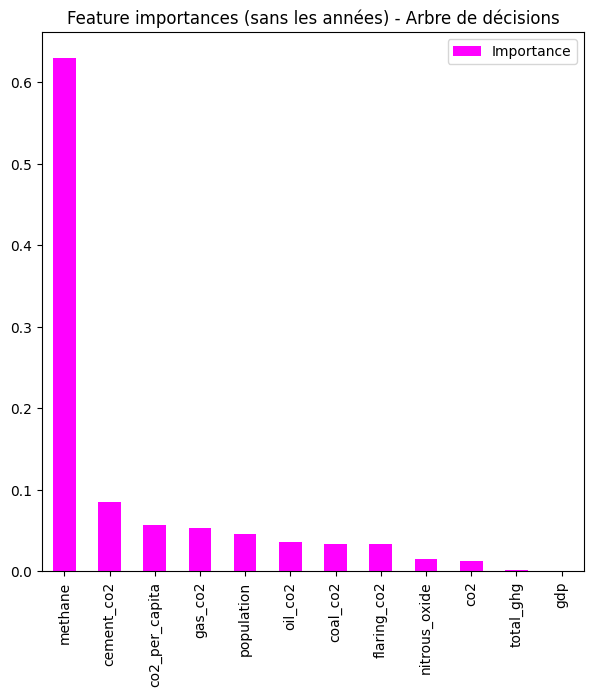

In [33]:
import matplotlib.pyplot as plt

feature_importances = pd.DataFrame(dtr.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.plot(kind='bar', figsize=(7,7), color='magenta')
plt.title('Feature importances (sans les années) - Arbre de décisions')
plt.show();

In [34]:
#Forêt aléatoire sans les années
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)

print("Score ensemble train", rfr.score(X_train, y_train))
print("Score ensemble test", rfr.score(X_test, y_test))

Score ensemble train 0.9538025470628532
Score ensemble test 0.7172093852855339


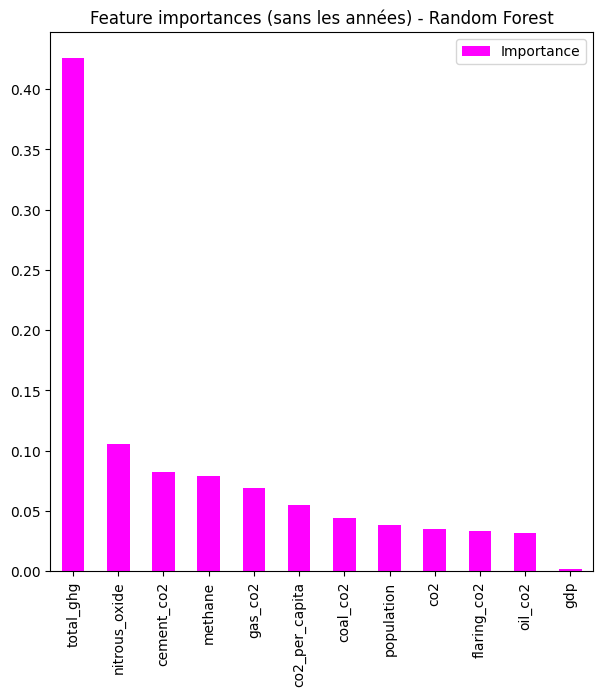

In [35]:
feature_importances = pd.DataFrame(rfr.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.plot(kind='bar', figsize=(7,7), color='magenta')
plt.title('Feature importances (sans les années) - Random Forest')
plt.show();

In [36]:
#Test Gradient Boosting sans les années
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor(random_state=42)
reg.fit(X_train, y_train)

print("Score ensemble train :",reg.score(X_train, y_train))
print("Score ensemble test :", reg.score(X_test, y_test))

Score ensemble train : 0.8676547909507756
Score ensemble test : 0.707904844074775


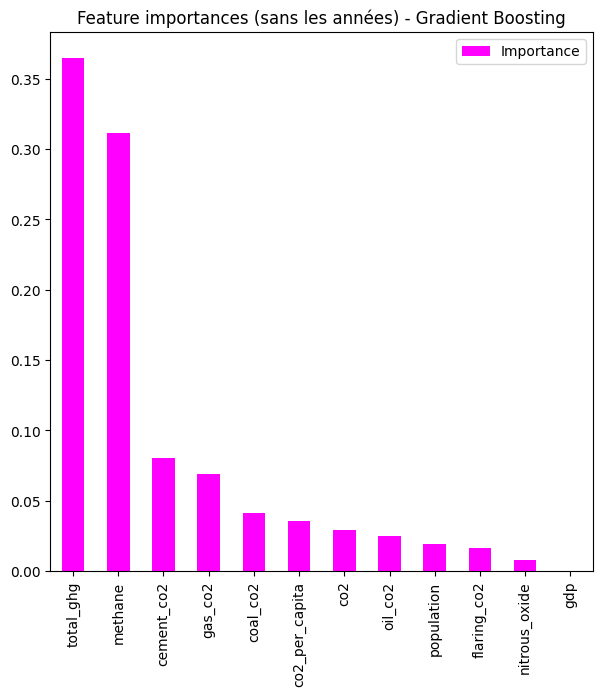

In [37]:
feature_importances = pd.DataFrame(reg.feature_importances_, index=X.columns, columns=['Importance'])
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
feature_importances.plot(kind='bar', figsize=(7,7), color='magenta')
plt.title('Feature importances (sans les années) - Gradient Boosting')
plt.show();

In [38]:
#Lasso sans les années
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

ls = make_pipeline(StandardScaler(), Lasso(alpha=.015))

ls.fit(X_train, y_train)

print("Score ensemble train :", ls.score(X_train, y_train))
print("Score ensemble test :", ls.score(X_test, y_test))

Score ensemble train : 0.554958894673853
Score ensemble test : 0.5581980997380726


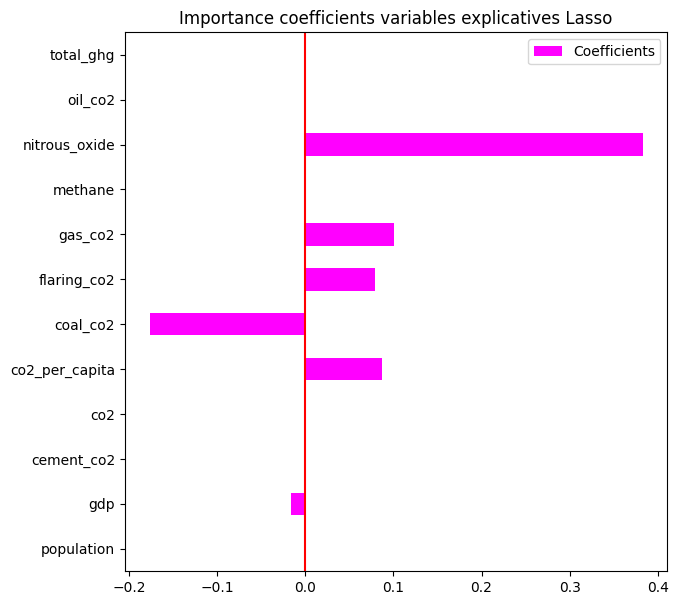

In [39]:
coefs = pd.DataFrame(ls[1].coef_, columns=['Coefficients'], index= X.columns)

coefs.plot(kind='barh', figsize=(7, 7), color = 'magenta')
plt.title('Importance coefficients variables explicatives Lasso')
plt.axvline(x=0, color='red')
plt.show();